In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

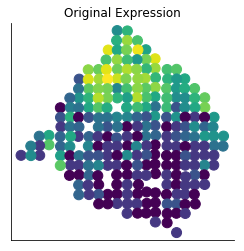

In [3]:
figsize(4, 4)
plt.scatter(sample_info.x, -sample_info.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Original Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-unshuff-example.pdf');

In [4]:
sample_info_shuffle = sample_info.copy()

In [5]:
tmp = sample_info.index.values.copy()
np.random.shuffle(tmp)
sample_info_shuffle['x'] = sample_info['x'][tmp].values
sample_info_shuffle['y'] = sample_info['y'][tmp].values

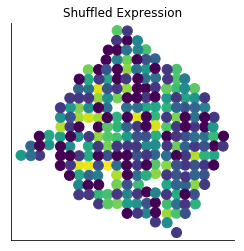

In [6]:
plt.scatter(sample_info_shuffle.x, -sample_info_shuffle.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Shuffled Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-shuff-example.pdf');

In [7]:
import NaiveDE

In [8]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info_shuffle, dfm.T, 'np.log(total_counts)').T

In [9]:
import SpatialDE

In [10]:
X = sample_info_shuffle[['x', 'y']]

In [11]:
shuffle_results = SpatialDE.run(X, res)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.083s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
INFO:root:Model 2 of 10                               
INFO:root:Model 3 of 10                               
INFO:root:Model 4 of 10                               
INFO:root:Model 5 of 10                               
INFO:root:Model 6 of 10                               
INFO:root:Model 7 of 10                               
INFO:root:Model 8 of 10                               
INFO:root:Model 9 of 10                               
INFO:root:Model 10 of 10                              


In [12]:
shuffle_results.query('qval < 0.05').shape

(2, 17)

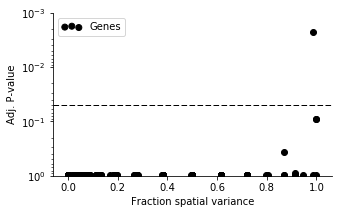

In [13]:
figsize(5, 3)

plt.yscale('log')
plt.scatter(shuffle_results.fraction_spatial_variance, shuffle_results.qval, c='k', label='Genes', rasterized=True);
plt.ylim(1e-3, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');
plt.legend(scatterpoints=3);
plt.savefig('shuffled_BC_FSV_qval.pdf');

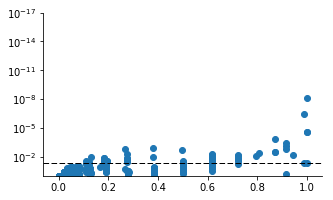

In [14]:
plt.yscale('log')
plt.scatter(shuffle_results.fraction_spatial_variance, shuffle_results.pval);
plt.ylim(1e-17, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);

In [15]:
shuffle_results.sort_values('pval').head(10)

,Gower,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,BIC,max_ll_null,LLR,fraction_spatial_variance,pval,qval
11992,0.834688,4,ADAM11,3.125663,0.000045,100.220394,0.649624,45.795437,SE,250,0.002567,-178.354945,67.049670,33.170725,0.999946,8.441188e-09,0.000109
7403,0.994366,4,PAX9,0.641736,0.013764,123.874324,-1.360959,0.816164,SE,250,0.002751,-225.662804,97.969481,25.904843,0.986347,3.586681e-07,0.002306
8487,0.978164,4,CYP2B6,1.087806,0.000790,103.818026,-1.319006,0.416194,SE,250,0.002941,-185.550208,86.290461,17.527565,0.999193,2.831723e-05,0.091012
9029,0.978164,4,KRT75,1.087806,0.000790,129.761736,-1.310775,0.392532,SE,250,0.002408,-237.437627,112.234171,17.527565,0.999193,2.831723e-05,0.091012
7014,0.994366,4,WDR53,0.641736,0.148858,111.112765,-1.216623,0.618748,SE,250,0.002459,-200.139687,96.600449,14.512316,0.869791,1.392462e-04,0.358030
7497,0.994366,4,ZNF461,0.641736,0.092462,49.757197,-1.428343,0.881544,SE,250,0.002520,-77.428550,37.322644,12.434553,0.914925,4.214631e-04,0.903055
7443,0.994366,4,PDIA6,0.641736,0.092462,111.800197,-1.118227,0.540140,SE,250,0.002464,-201.514551,100.309799,11.490398,0.914925,6.995665e-04,0.974739
8907,0.978164,4,RAB37,1.087806,1.609930,71.712457,-1.236376,0.211078,SE,250,0.002550,-121.339070,61.169017,10.543439,0.377948,1.166012e-03,0.974739
7108,0.994366,4,AFAP1L1,0.641736,0.092462,22.869285,-1.392947,0.849914,SE,250,0.002459,-23.652726,12.806250,10.063035,0.914925,1.512738e-03,0.974739
10387,0.936002,4,FAM26E,1.843940,2.591873,-13.404380,-1.250561,0.107007,SE,250,0.002428,48.894604,-23.255395,9.851015,0.265316,1.697381e-03,0.974739


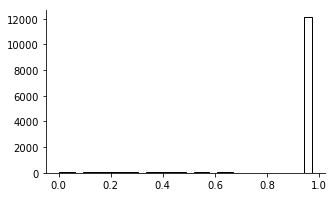

In [16]:
shuffle_results.pval.hist(bins=32, fc='w', ec='k', grid=False);

In [17]:
from scipy import stats

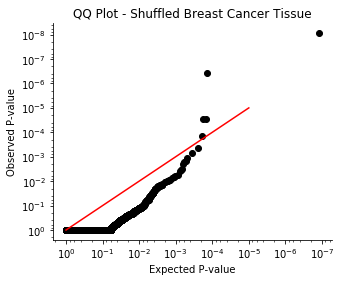

In [18]:
figsize(5, 4)

chi2_samples = pd.Series(stats.chi2.rvs(df=1, size=shuffle_results.LLR.shape[0]))
pval_samples = 1 - stats.chi2.cdf(chi2_samples.sort_values(), df=1)
pval_observed = 1 - stats.chi2.cdf(shuffle_results.LLR.sort_values(), df=1)

plt.loglog()
plt.scatter(pval_samples, pval_observed, marker='o', c='k', rasterized=True);
plt.plot([1e-5, 1], [1e-5, 1], c='r');

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Expected P-value')
plt.ylabel('Observed P-value');

plt.title('QQ Plot - Shuffled Breast Cancer Tissue');
plt.savefig('shuffled_bc_qq_plot.pdf');